In [2]:
"""
This script imports necessary libraries and sets up the plotting style for calibration plots.
"""

import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import pandas as pd
import SBNDstyle
import matplotlib.pyplot as plt
plt.style.use('SBND.mplstyle')
import matplotlib.colors as mcolors
import glob
import pandas as pd


/home/rodrigoa/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [1]:
## DC Plots

In [2]:
DEBUG=False

def get_data_at_OV(OV):

    # Define the folder path
    folder_path = 'data'

    # Define the characters to search for
    characters = '_'+str(OV)

    # Search for files in the folder and its subfolders
    file_list = glob.glob(f'{folder_path}/**/*{characters}*', recursive=True)
    if DEBUG: print(file_list[:3])
    
    # Create an empty list to store the DataFrames
    dfs = []

    # Loop through the file list
    for file in file_list:
        # Read the file and convert it to a DataFrame
        df = pd.read_csv(file)  # Replace with the appropriate method based on the file format
        
        # Append the DataFrame to the list
        dfs.append(df)

    # Concatenate the DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

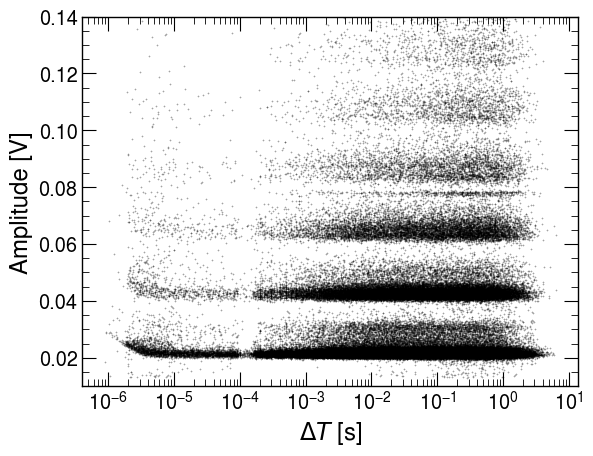

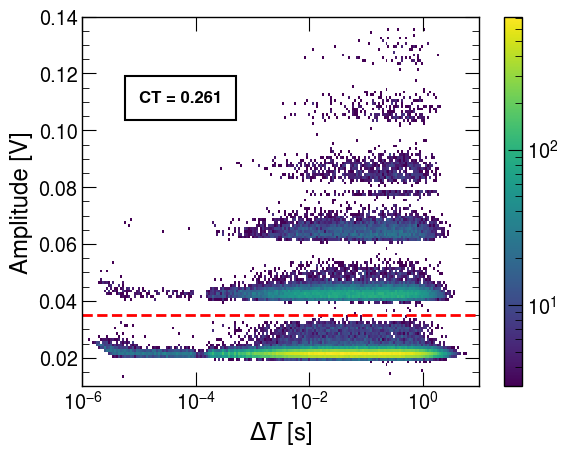

In [45]:
%matplotlib inline
# OVs      = [35,45,7]
# low_lims = [0.005,0.007,0.014]

# OVs      = [45]
# low_lims = [0.005]
# CT_lim=0.022

OVs      = [7]
low_lims = [0.013]
CT_lim=0.035


for ov,low_lim in zip(OVs,low_lims):
    
    combined_df=get_data_at_OV(ov)
    
    x=combined_df["DeltaT"].array
    y=combined_df["Amplitude"].array

    x=x[y>low_lim]
    y=y[y>low_lim]

    plt.figure()
    plt.plot(x,y,'s',markersize=0.1,linestyle='None',color='black')
    plt.semilogx()
    plt.ylim(0.01,0.14)
    plt.ylabel('Amplitude [V]')
    plt.xlabel('$\Delta T$ [s]')

    plt.show()

    plt.figure()

    rx=np.logspace(-6,1,200)
    ry=np.arange(0,0.2,0.001)

    plt.hist2d(x, y, bins=[rx,ry], cmap='viridis',cmin=3, norm=mcolors.LogNorm())
    plt.ylim(0.01,0.14)
    plt.colorbar()
    plt.semilogx()
    plt.ylabel('Amplitude [V]')
    plt.xlabel('$\Delta T$ [s]')
    
    plt.hlines(CT_lim,0.000001,10,linestyle='--',color='red')
    CT_raw=sum((y>CT_lim) * (y<0.12) )/len(y)
    plt.text(0.00001,0.11,'CT = '+str(round(CT_raw,3)),color='black',fontsize=12,fontweight='bold',bbox={'edgecolor': 'black',"facecolor":"white",'pad': 10})
    
    plt.show()


## Total Gain

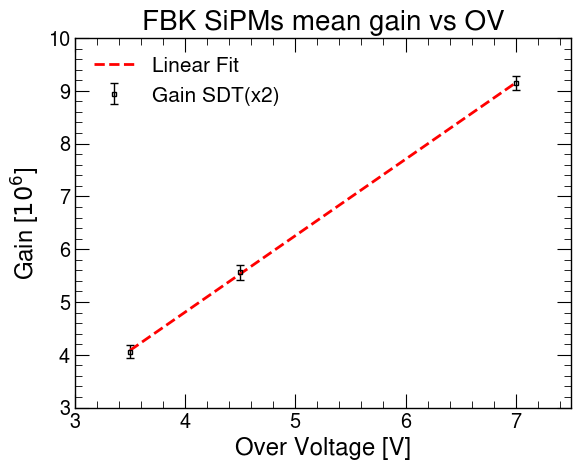

In [7]:
import numpy as np
# plt.plot(data['OV'].array,data['Gain'].array,'^',markersize=2)

grouped_data_mean = data.groupby('OV')['Gain'].mean().to_list()
grouped_data_std  = data.groupby('OV')['Gain'].std() .to_list()
OVs=unique_values = data["OV"].unique()
plt.errorbar(OVs,grouped_data_mean,np.array(grouped_data_std)*2,fmt='--s',markersize=3,markerfacecolor="None",capsize=3,capthick=1,elinewidth=1,ecolor="black",color="black",linewidth=0,label="Gain SDT(x2)")
slope, intercept = np.polyfit(OVs, grouped_data_mean, 1)
linear_fit = np.polyval([slope, intercept], OVs)

plt.legend(loc='upper left', fontsize=15)
plt.title('Mean Gain vs OV', fontsize=20)
plt.xlabel('OV [V]')
plt.ylabel('Gain')
plt.xlim(3, 7.5)
plt.ylim(3, 10)

plt.plot(OVs, linear_fit, '--', label='Linear Fit', color='red'
         )

plt.legend(loc='upper left', fontsize=15)
plt.title('FBK SiPMs mean gain vs OV', fontsize=20)
plt.xlabel('Over Voltage [V]')
plt.ylabel('Gain [$10^6$]')
plt.xlim(3, 7.5)
plt.ylim(3, 10)
plt.savefig("final_plots/Gain_vs_OV_total.png", bbox_inches='tight')
plt.savefig("final_plots/Gain_vs_OV_total.pdf", bbox_inches='tight')

## Plotting the gain vs OV for each channel

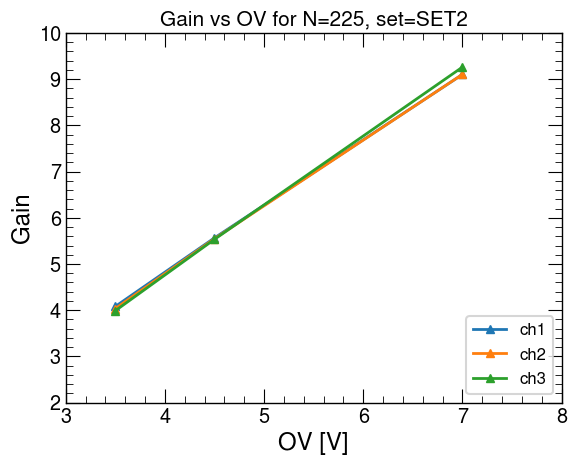

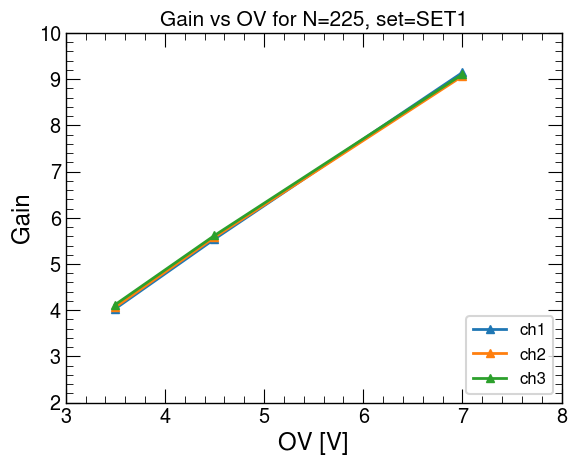

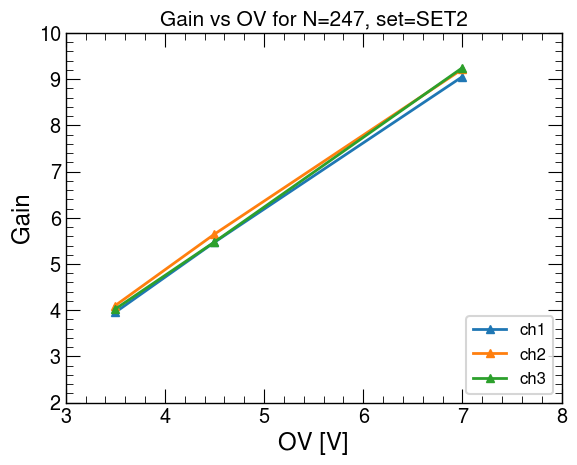

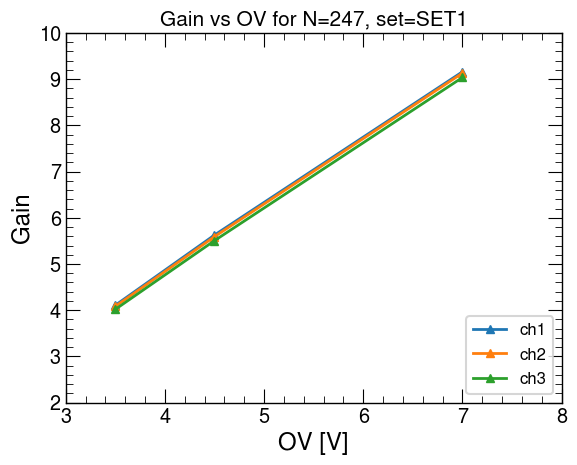

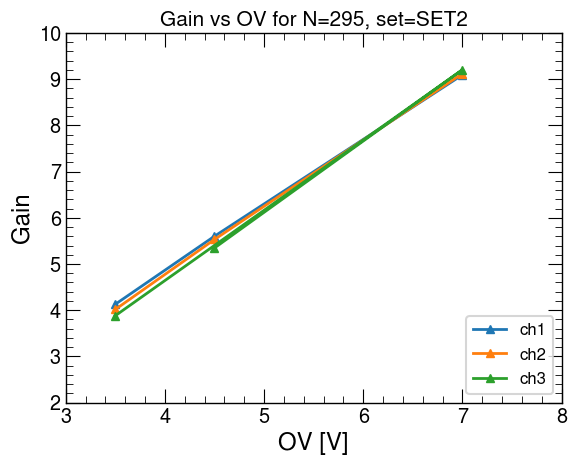

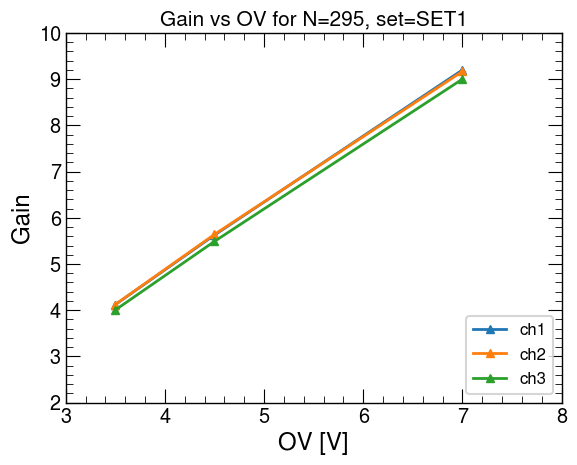

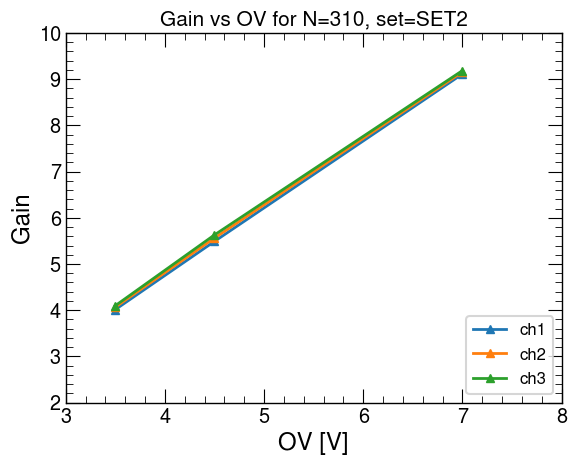

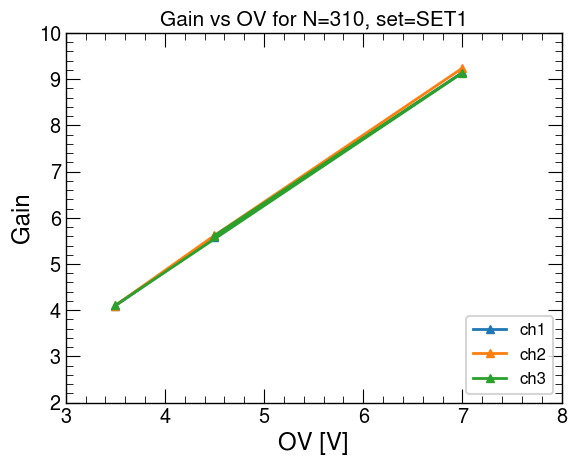

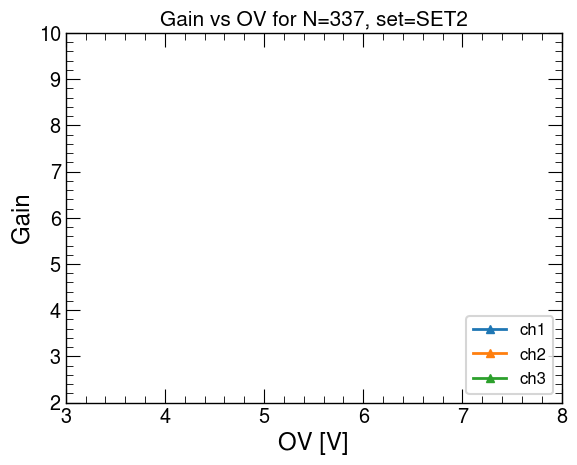

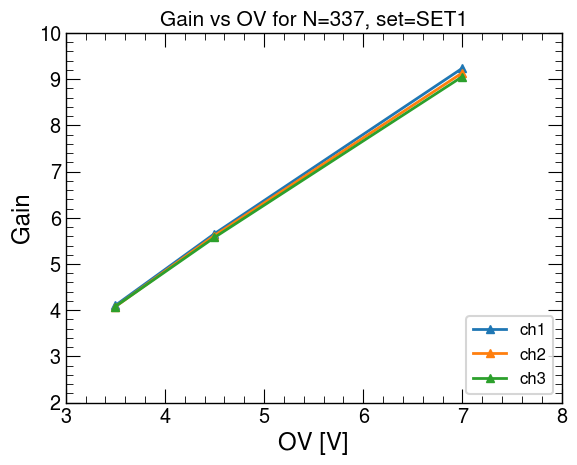

In [5]:
for N in [225,247,295,310,337]:
    for s in ["SET2","SET1"]:
        plt.figure()
        for ch in [1,2,3]:
            aux=data[(data['N']==N) & (data['set']==s) & (data['ch']==ch)]

            plt.plot(aux['OV'].array,aux['Gain'].array,'-^',label=f'ch{ch}')
            plt.title(f'Gain vs OV for N={N}, set={s}',fontsize=15)
            plt.legend(frameon=True,loc='lower right')
            plt.xlabel('OV [V]')
            plt.ylabel('Gain')
            plt.xlim(3,8)
            plt.ylim(2,10)